# Clear Mice cells and produce a dataset without them

In [1]:
cd /workspace

/workspace


In [13]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import os

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir='./out/qc_human_mouse'
sc.settings.set_figure_params(dpi=100, dpi_save=300,fontsize=12, frameon=False, facecolor='white', format='png', color_map='Reds')



In [3]:
print(sc.settings.figdir)

out


In [4]:
results_file = 'data/Human_filtered.h5ad'  # the file that will store the analysis results

In [5]:
adata = sc.read_10x_mtx('./data/human_mouse/')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [6]:
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 3345 × 68886
    var: 'gene_ids', 'feature_types'

In [7]:
adata.obs_names_make_unique()
adata.var_names_make_unique()
adata.var.index.is_unique
adata

AnnData object with n_obs × n_vars = 3345 × 68886
    var: 'gene_ids', 'feature_types'

# Check how the genes are annotated and count the different sources

In [8]:
adata.var_names

Index(['GRCh38_MIR1302-2HG', 'GRCh38_FAM138A', 'GRCh38_OR4F5',
       'GRCh38_AL627309.1', 'GRCh38_AL627309.3', 'GRCh38_AL627309.2',
       'GRCh38_AL627309.5', 'GRCh38_AL627309.4', 'GRCh38_AP006222.2',
       'GRCh38_AL732372.1',
       ...
       'mm10___Gm16367', 'mm10___AC163611.1', 'mm10___AC163611.2',
       'mm10___AC140365.1', 'mm10___AC124606.2', 'mm10___AC124606.1',
       'mm10___AC133095.2', 'mm10___AC133095.1', 'mm10___AC234645.1',
       'mm10___AC149090.1'],
      dtype='object', length=68886)

In [9]:
sum(adata.var_names.str.startswith('GRCh38_MT-')), sum(adata.var_names.str.startswith('GRCh38')), sum(adata.var_names.str.startswith('mm10'))

(13, 36601, 32285)

# Plot highest expressed genes and count 

normalizing counts per cell
    finished (0:00:00)


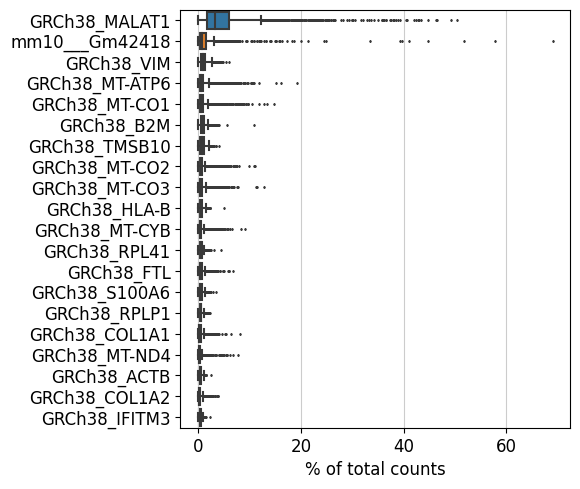

filtered out 43022 genes that are detected in less than 5 cells


AnnData object with n_obs × n_vars = 3345 × 25864
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_mouse', 'pct_counts_mouse'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'mouse', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20,save='mouse_MSOD' )
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, min_counts=200)
sc.pp.filter_genes(adata, min_cells=5)
adata.var['mt'] = adata.var_names.str.startswith('GRCh38_MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['human'] = adata.var_names.str.startswith('GRCh38')  # annotate the group of mitochondrial genes as 'human'
adata.var['mouse'] = adata.var_names.str.startswith('mm10')  # annotate the group of mitochondrial genes as 'rat'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['human'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mouse'], percent_top=None, log1p=False, inplace=True)
adata

In [11]:
adata.obs['pct_counts_mouse']

AAACCCAAGCAACAAT-1    0.489987
AAACCCAAGGAAACGA-1    2.801729
AAACCCAAGGGTAATT-1    0.628881
AAACCCAAGTTCTCTT-1    0.956633
AAACCCAGTGCATCTA-1    0.627119
                        ...   
TTTGGTTTCAATCTTC-1    3.728507
TTTGGTTTCATCCCGT-1    0.729807
TTTGTTGCAATTTCTC-1    0.662172
TTTGTTGCATGGCTAT-1    1.985149
TTTGTTGGTGTTGAGG-1    0.282468
Name: pct_counts_mouse, Length: 3345, dtype: float32

# Plot number of counts per cell, genes and percentage of mitochondrial, human and mouse cells

... storing 'feature_types' as categorical


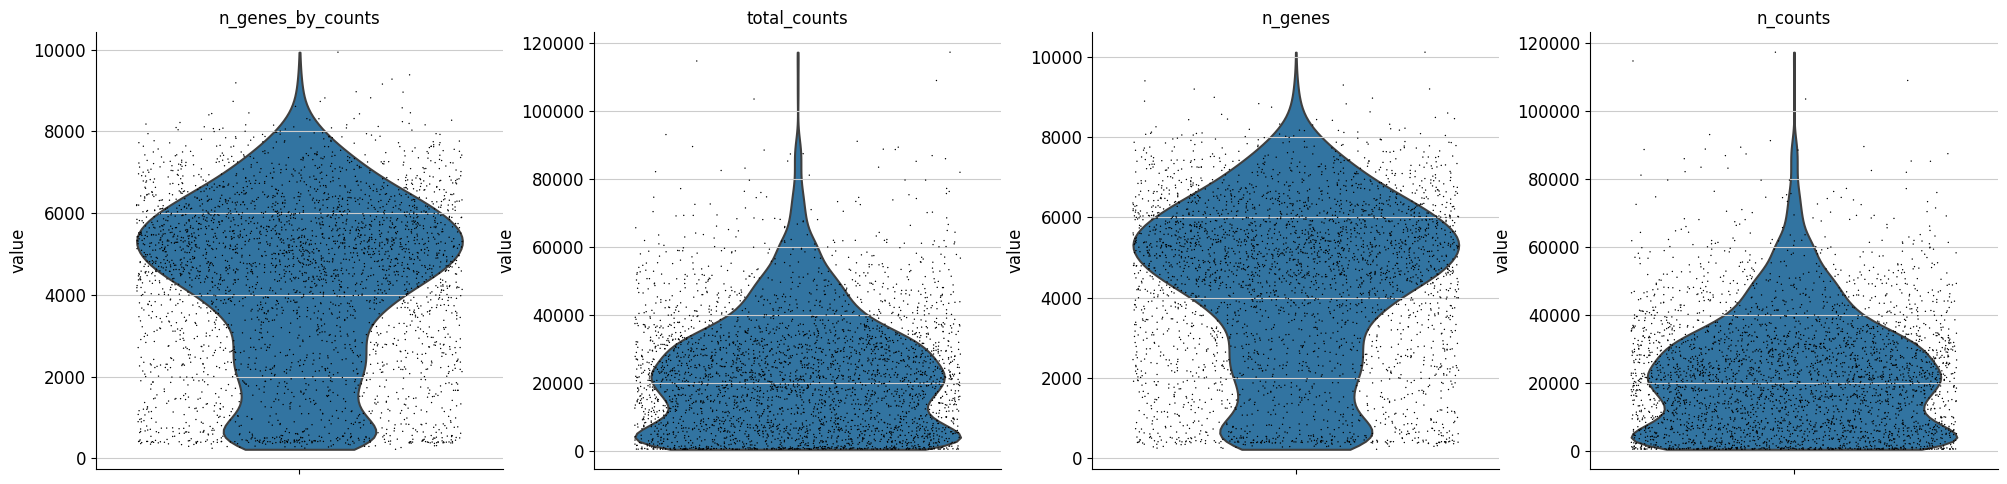

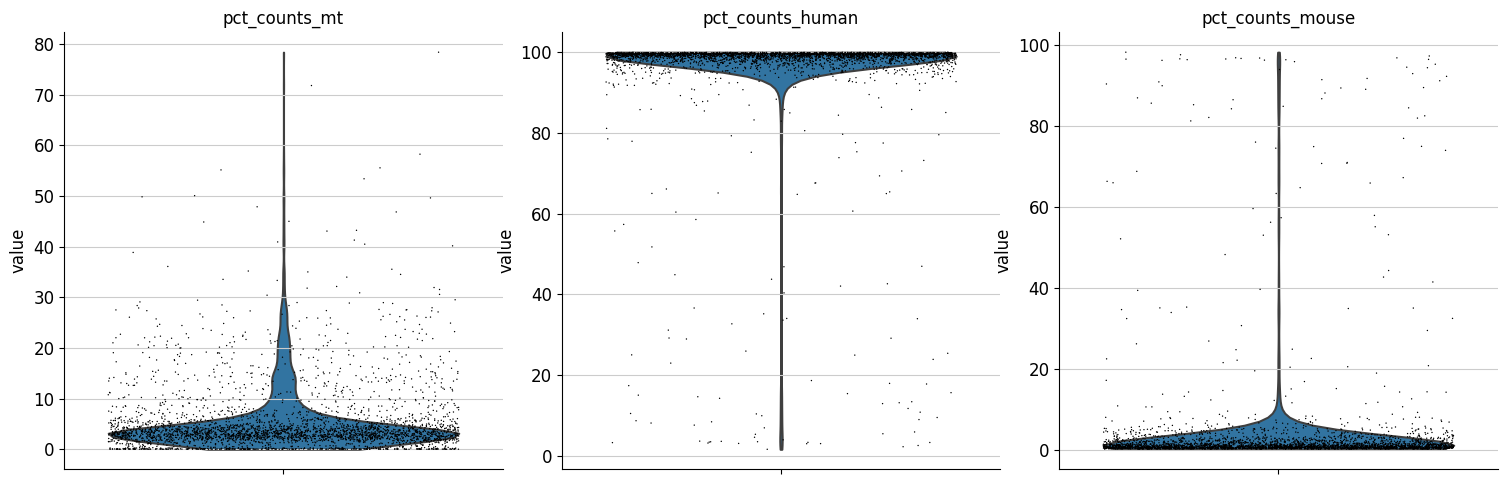

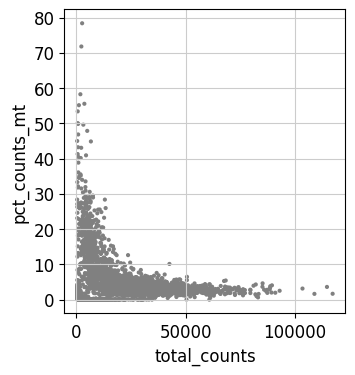

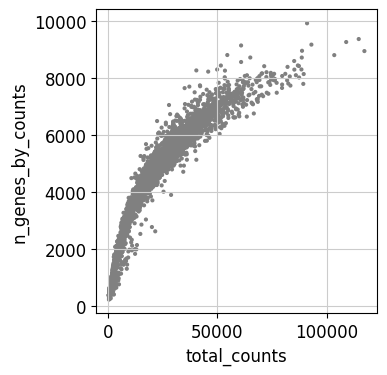

In [12]:
sc.pl.violin(adata, ['n_genes_by_counts','total_counts','n_genes', 'n_counts'], jitter=0.4, multi_panel=True ,save='_nGenes_TotalCounts_mouse_MSOD')#l;abels do not work with multipanel
sc.pl.violin(adata,['pct_counts_mt', 'pct_counts_human', 'pct_counts_mouse'], jitter=0.4, multi_panel=True, save= '_pct_mit_human_mouse_MSOD')

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',save='_pctMT_total_counts_mouse_MSOD' ) #Cut under 10% mit
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',save='_total_genes_by_counts_mouse_MSOD') # cut under 5000 genes by counts

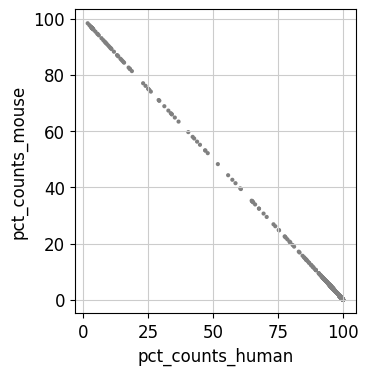

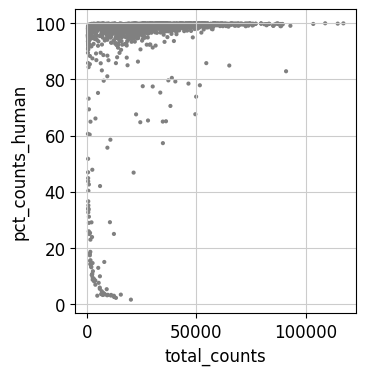

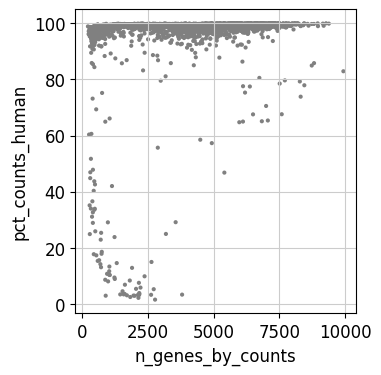

In [14]:
sc.pl.scatter(adata, x='pct_counts_human', y='pct_counts_mouse',save='_pct_humanVmouse_msod')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_human',save= '_total_pctHuman_MSOD')
sc.pl.scatter(adata, x='n_genes_by_counts', y='pct_counts_human', save='_gnesbyCounts_pctHuman_MDOD')

In [15]:
adata

AnnData object with n_obs × n_vars = 3345 × 25864
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_mouse', 'pct_counts_mouse'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'mouse', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

# clean cells with less than 6000 genes by counts, less than 10% mitochondrial genes and more than 90% human reads

In [16]:
adata =adata[adata.obs.pct_counts_human > 90, : ]

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [17]:
adata

View of AnnData object with n_obs × n_vars = 3225 × 25864
    obs: 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_human', 'pct_counts_human', 'total_counts_mouse', 'pct_counts_mouse'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'human', 'mouse', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [18]:
adata.write(results_file)